In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
#from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np

In [2]:
provider0 = IBMQ.load_account()
provider1 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backends = provider0.backends()
backend = provider0.get_backend('ibmq_16_melbourne')

print("The backend is " + backend.name())

The backend is ibmq_16_melbourne


In [3]:
simulator = Aer.get_backend('qasm_simulator')
pi = np.pi

In [4]:
q = QuantumRegister(7)
c = ClassicalRegister(7)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])


qc.x(q[6])


qc.cswap(q[2],q[3],q[4])
qc.cswap(q[2],q[4],q[5])
qc.cswap(q[2],q[5],q[6])


qc.cswap(q[1],q[3],q[4])
qc.cswap(q[1],q[4],q[5])
qc.cswap(q[1],q[5],q[6])

qc.cswap(q[1],q[3],q[4])
qc.cswap(q[1],q[4],q[5])
qc.cswap(q[1],q[5],q[6])




qc.cswap(q[0],q[3],q[4])
qc.cswap(q[0],q[4],q[5])
qc.cswap(q[0],q[5],q[6])

qc.cswap(q[0],q[3],q[4])
qc.cswap(q[0],q[4],q[5])
qc.cswap(q[0],q[5],q[6])

qc.cswap(q[0],q[3],q[4])
qc.cswap(q[0],q[4],q[5])
qc.cswap(q[0],q[5],q[6])

qc.cswap(q[0],q[3],q[4])
qc.cswap(q[0],q[4],q[5])
qc.cswap(q[0],q[5],q[6])

#qc.measure(q[0], c[0])
#qc.measure(q[1], c[1])
#qc.measure(q[2], c[2])

qc.h(q[0])

qc.cu1(pi/2,q[1] ,q[0])
qc.h(q[1])

qc.cu1(pi/4,q[2] ,q[0])
qc.cu1(pi/2,q[2] ,q[1])
qc.h(q[2])

#qc.cu1(pi/8,q[3] ,q[0])
#qc.cu1(pi/4,q[3] ,q[1])
#qc.cu1(pi/2,q[3] ,q[2])
#qc.h(q[3])

qc.swap(q[2] ,q[0])


qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

# IBMQ16

In [5]:
job_exp = execute(qc, backend=backend, shots=8192)
counts = job_exp.result().get_counts(qc)

In [6]:
print(counts)

{'0000001': 1477, '0000000': 1745, '0000101': 1069, '0000010': 966, '0000011': 716, '0000110': 543, '0000100': 1128, '0000111': 548}


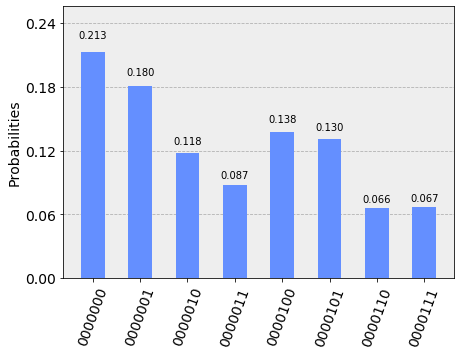

In [7]:
plot_histogram(counts)

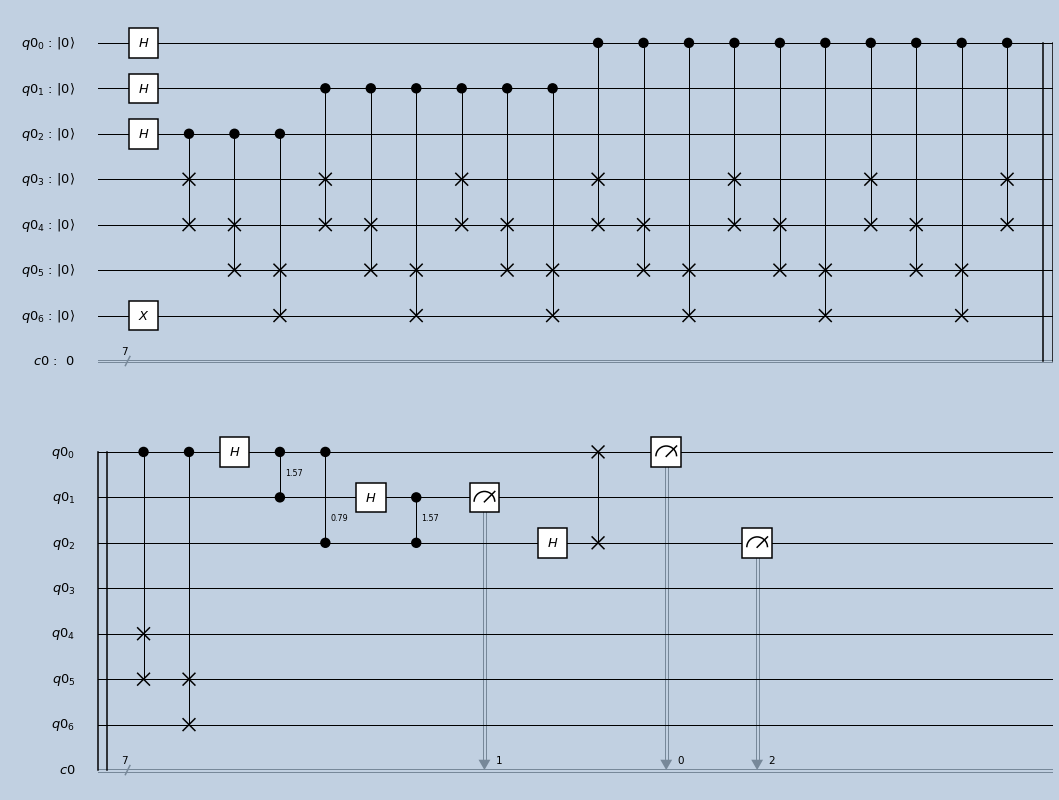

In [8]:
style = { 'cregbundle' : 'True' , 'backgroundcolor' : '#C1D0E1'}
qc.draw(output='mpl', style = style)

# Simulator

In [9]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [10]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'0000001': 2018, '0000000': 2072, '0000011': 2085, '0000010': 2017}


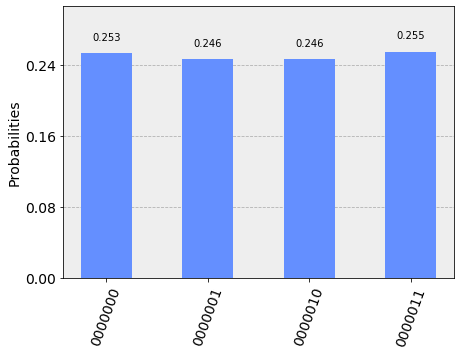

In [11]:
plot_histogram(counts_sim)

|0>+|4>+|2>+|6>